In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.insert(0, '../src')
import utils.visualization as vis
from utils.preprocession import sparsen

from models.XPLORE import XPLORE

In [17]:
def show(n=0, q='32214'):
    n = xplore.fit_reactions.index[n]
    fig, (ax1, ax2) = plt.subplots(1,2)

    train_colors = xplore.fit_index.map(candidates.color.to_dict())
    vis.plotEmbedding(xplore.embedding, n=n, c=train_colors, 
                      ax=ax1, highlight={'color':train_colors.loc[n]})

    user = xplore.fit_reactions.loc[n]
    # user.loc[:] = np.NaN
    answers = user.loc[~user.isna()]
    vis.plotObjective(xplore.posterior, answers, d=0, r=xplore.r, area=xplore.area, ax=ax1)

    x, y = xplore.embed(answers)
    ax1.scatter(x, y, marker='x', color='black', s=10, label='Optimized Coordinates', zorder=5)
    _ = ax1.set_title(f'MSE Loss Function for User {n}')

    rgba = vis.colormap(user.astype(float).loc[str(q)])
    vis.plotEmbedding(xplore.embedding, n=n, highlight={'color':rgba},
                    c=xplore.fit_reactions.loc[:,str(q)], ax=ax2)
    vis.plotFeature(xplore.predict, q, d=0, r=xplore.r, area=xplore.area, ax=ax2)
    _ = ax2.set_title(f'Probabilities for Feature {q}')
    print(questions.loc[int(q), 'question_EN'])
    print(xplore.fit_rmse, xplore.fit_accuracy)
    return fig, (ax1,ax2)


## Load Data

In [3]:
folder_name = '../data'
initial_data = 'candidates_reactions'

questions = pd.read_csv('../data/questions.csv', index_col=0)
candidates = pd.read_csv(f'{folder_name}/candidates.csv', index_col=0)
coldstart = pd.read_csv(f'{folder_name}/{initial_data}.csv', index_col=0)
coldstart

,32214,32215,32216,32217,32218,32219,32220,32221,32222,32223,...,32279,32280,32281,32282,32283,32284,32285,32286,32287,32288
9,1.00,0.25,1.00,1.00,0.00,0.25,1.00,0.00,0.75,0.00,...,0.17,0.17,0.25,1.00,0.00,0.75,0.25,0.50,0.50,0.25
16,0.25,0.75,0.75,0.00,0.75,1.00,0.00,1.00,0.00,1.00,...,0.33,0.83,0.50,0.75,0.75,0.50,0.25,0.75,0.75,0.00
25,1.00,1.00,1.00,0.00,0.00,0.75,0.00,0.25,0.00,0.25,...,0.33,0.67,0.50,0.75,0.50,0.75,0.50,0.50,0.50,0.50
30,0.00,1.00,1.00,0.00,1.00,1.00,0.25,0.75,0.00,0.00,...,0.00,1.00,1.00,1.00,0.50,1.00,0.00,0.50,0.00,1.00
31,0.00,1.00,0.25,0.00,1.00,1.00,0.25,0.25,0.00,0.00,...,0.00,1.00,0.75,1.00,0.25,1.00,0.00,0.50,0.25,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,0.75,0.00,0.75,0.75,0.00,0.00,0.00,0.00,0.75,0.75,...,0.83,0.00,0.00,0.25,0.75,0.25,0.75,0.75,0.75,0.00
5918,0.75,0.75,1.00,0.75,0.75,0.00,0.00,1.00,0.75,0.75,...,0.33,0.33,0.50,0.75,0.25,0.50,0.50,0.50,0.50,0.75
5921,1.00,0.75,0.75,1.00,1.00,0.25,0.00,0.00,0.25,0.00,...,0.17,1.00,0.75,0.75,0.25,0.25,0.50,0.50,0.75,0.50
5922,0.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.25,...,0.00,1.00,0.75,1.00,0.50,1.00,0.00,0.50,0.00,1.00


In [4]:
xplore = XPLORE(coldstart, 
                xmin=-1, xmax=1, resolution=200, 
                prior_cov=np.array([[.075, 0], [0, .075]])
                )
xplore.items.head()

,beta1,beta2,alpha
32214,1.617838,-3.421553,-0.418051
32215,-3.599476,1.281332,0.446724
32216,-0.647695,0.816033,1.080903
32217,1.951557,-3.968032,-0.153674
32218,-4.754032,0.321055,0.356404


0.2564247408012792 0.7786727567217363


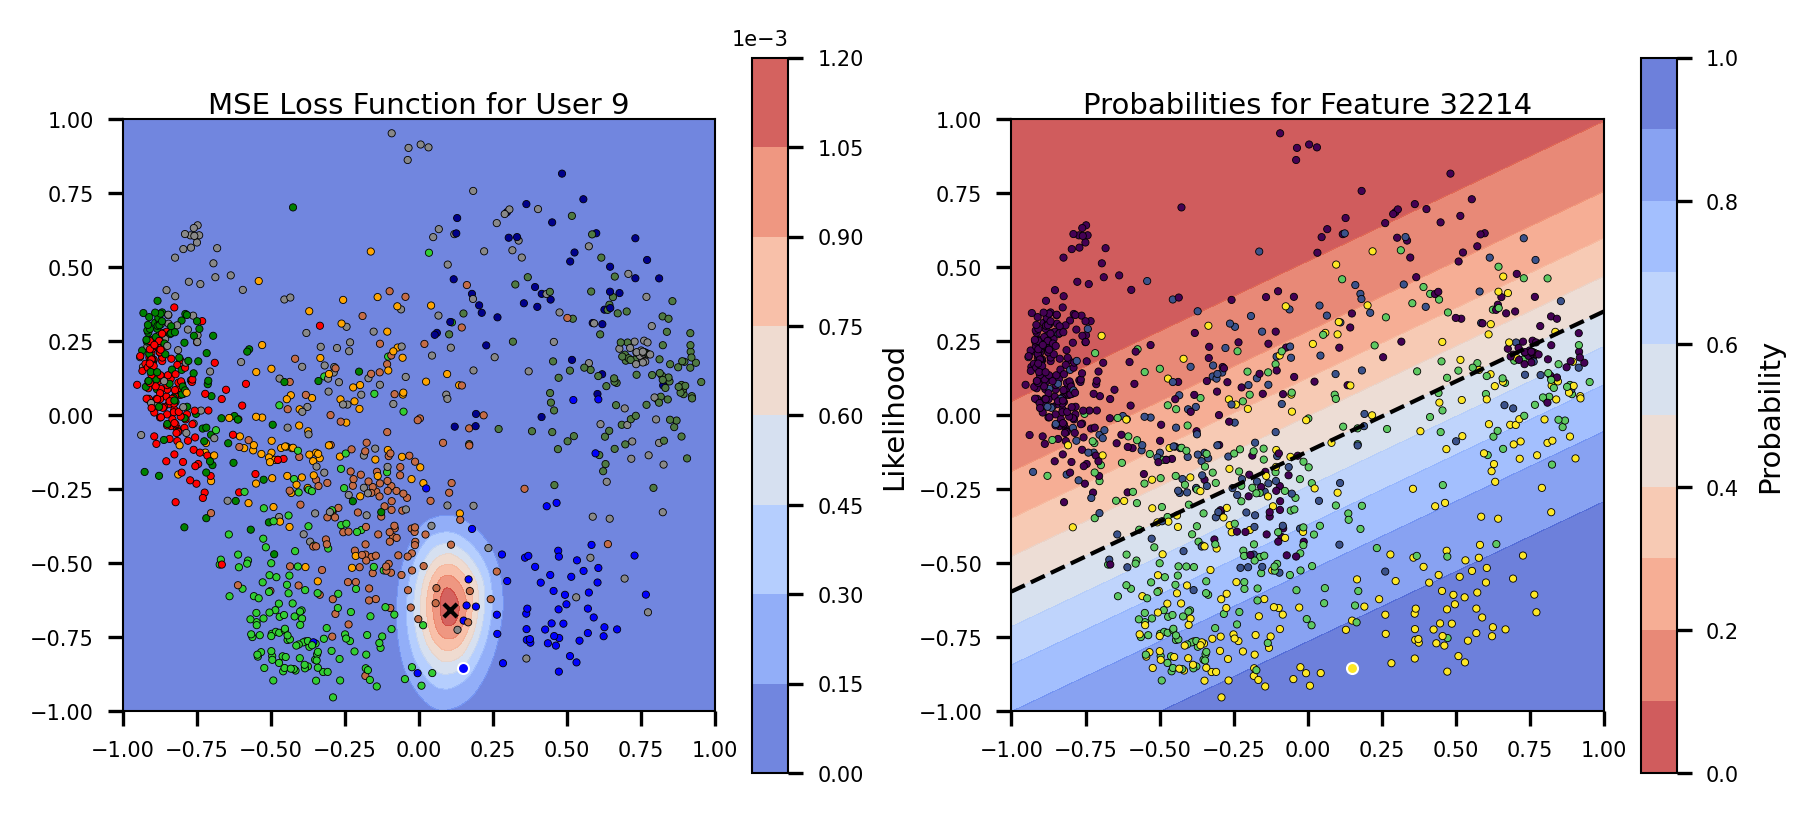

In [5]:
xplore.evaluate()
_ = show()

In [6]:
xplore.items.beta2 = -xplore.items.beta2
xplore.likelihood_X = pd.DataFrame(xplore.predict(xplore.X), columns = xplore.items.index)

In [7]:
xplore.computePosteriors()

Do you support an increase in the retirement age (e.g., to 67)?
0.2564247408012792 0.7786727567217363


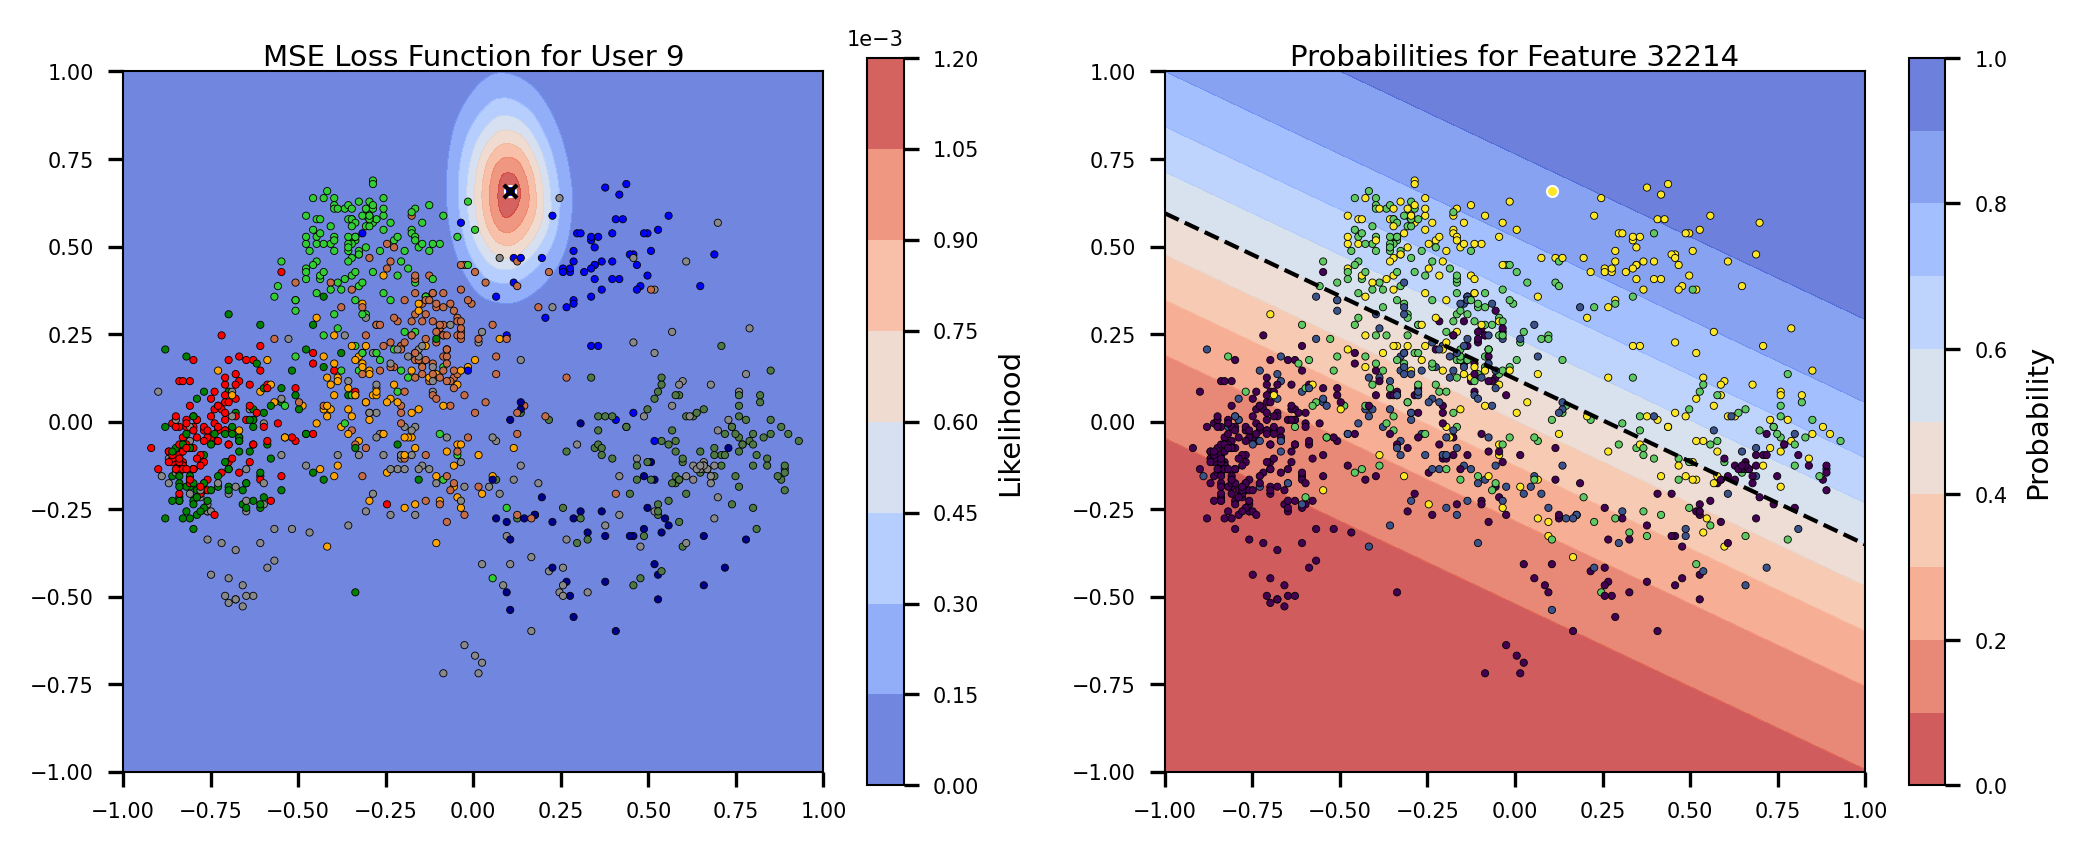

In [18]:
fig, (ax1,ax2) = show()
fig.set_size_inches(vis.textwidth, 0.4*vis.textwidth)
fig.tight_layout()
fig.savefig('../figures/candidate_embedding.pdf')

In [9]:
np.isclose(xplore.embedding.abs().max().max(),1)

False

In [10]:
xplore.items.to_csv('../results/xplore/item_parameters_candidates_full.csv')
xplore.embedding.to_csv('../results/xplore/embedding_candidates_full.csv')

In [11]:
# Pickling the object
with open('../results/xplore/xplore.pickle', 'wb') as file:
    pickle.dump(xplore, file)

print("Data has been pickled.")

Data has been pickled.


In [12]:
with open('../results/xplore/xplore.pickle', 'rb') as file:
    xplore = pickle.load(file)
xplore.items

,beta1,beta2,alpha
32214,1.617838,3.421553,-0.418051
32215,-3.599476,-1.281332,0.446724
32216,-0.647695,-0.816033,1.080903
32217,1.951557,3.968032,-0.153674
32218,-4.754032,-0.321055,0.356404
...,...,...,...
32284,-1.773229,-0.095368,0.574069
32285,1.830637,-0.259153,-0.416285
32286,0.702293,0.037892,0.197040
32287,1.981198,0.545581,0.154736


In [13]:
prior_probs = (xplore.likelihood_X * xplore.prior_X.reshape(-1,1)).sum(axis=0)
prior_gini  = 2 * prior_probs * (1-prior_probs)
prior_gini.sort_values()


32220    0.334022
32268    0.339061
32272    0.362054
32250    0.362648
32262    0.367557
           ...   
32225    0.499630
32281    0.499941
32239    0.499985
32248    0.499998
32226    0.500000
Length: 75, dtype: float64

Should the federal government provide more financial support for public housing construction?
0.2564247408012792 0.7786727567217363


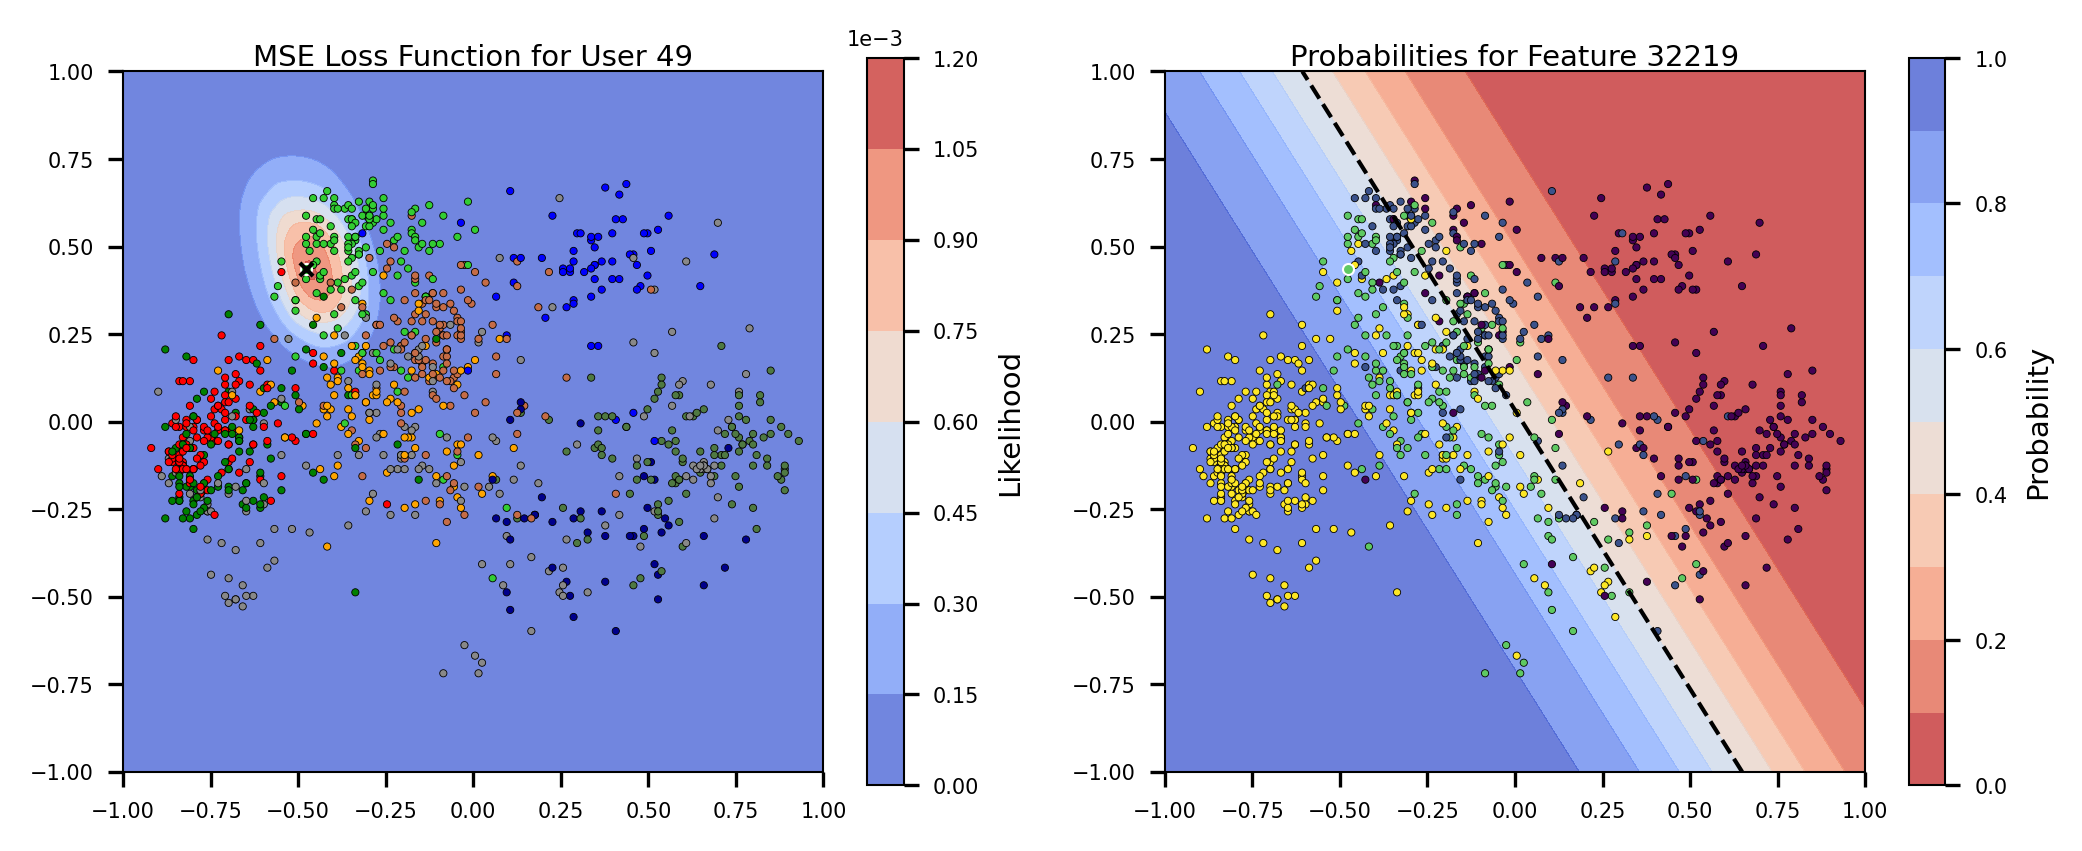

In [19]:
fig, (ax1,ax2) = show(9,32219)
fig.set_size_inches(vis.textwidth, 0.4*vis.textwidth)
fig.tight_layout()

What is your position the following statement: "Stronger environmental protection is necessary, even if its application limits economic growth."
0.2564247408012792 0.7786727567217363


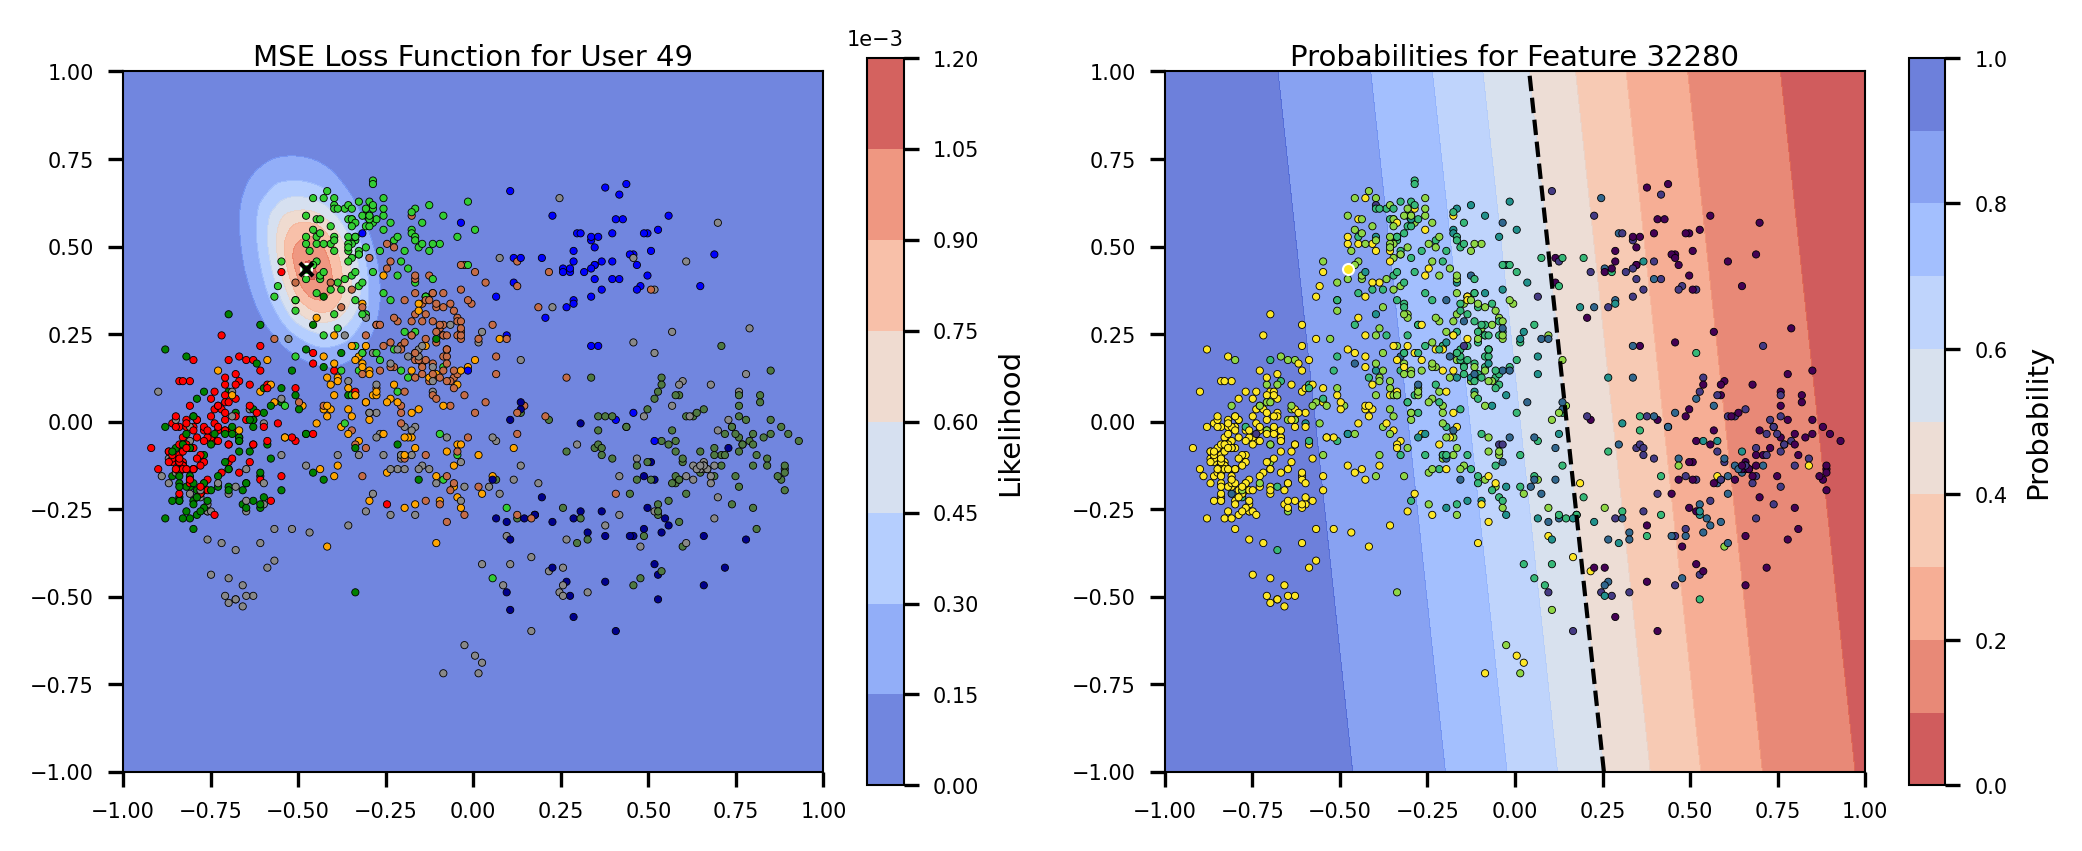

In [20]:
fig, (ax1,ax2) = show(9,32280)
fig.set_size_inches(vis.textwidth, 0.4*vis.textwidth)
fig.tight_layout()


In [16]:
for i in questions.loc[prior_gini.sort_values().tail(5).index.astype(int), 'question_EN']:
    print(i)

According to the Swiss integrated schooling concept, children with learning difficulties or disabilities should be taught in regular classes. Do you approve of this concept?
Should the federal government spend more in the area of "Social services"?
Should the differences between cantons with high and low financial capacity be further reduced through fiscal equalization?
Do you think it's fair that environmental and landscape protection rules are being relaxed to allow for the development of renewable energy?
Should the federal government raise the requirements for the gymnasiale matura?
